<a href="https://colab.research.google.com/github/SojeongShin/NLP_2023/blob/main/RNN%E1%84%8B%E1%85%B3%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%86%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [자연어처리]
# 11주차(11-1). RNN을 이용한 문서 분류

[링크 텍스트](https://)# 202001581 신소정 <- 본인의 학번, 이름으로 변경하여 제출
* **모든 셀 실행** 후 제출하시기 바랍니다.
* **실습 (11-2)**이 있습니다. (제출 기한: 11/14(화) 23시 59분까지)

# 이제 Colab 사용에 모든 수강생분들이 어느정도 익숙해 졌을 거라 생각됩니다!
> ##### 중간 중간 **'### ... 이 부분을 완성하시오'** 라는 부분의 코드를 완성해야 합니다.




## RNN을 이용한 문서 분류 - NLTK 영화 리뷰 감성분석

### 워드 임베딩을 위한 데이터 준비


In [2]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [3]:
from nltk.corpus import movie_reviews

# movie review data에서 file id를 가져옴
fileids = movie_reviews.fileids()

# file id를 이용해 raw text file을 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids]

# file id를 이용해 label로 사용할 category 즉 positive와 negative 정보를 순서대로 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

print('Reviews count:', len(reviews))
print('Length of the first review:', len(reviews[0]))
print('Labels:', set(categories))

Reviews count: 2000
Length of the first review: 4043
Labels: {'pos', 'neg'}


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(7)
tf.random.set_seed(7)

# 사용할 단어의 수
max_words = 10000

# 빈도가 높은 10000개의 단어(max_words)를 선택하도록 객체 생성
tokenizer = Tokenizer(num_words=10000, oov_token='UNK')  ### ... 이 부분을 완성하시오

# 단어 인덱스 구축: fit_on_texts() 이용
tokenizer.fit_on_texts(reviews)  ### ... 이 부분을 완성하시오

# 만들어진 단어 인덱스를 이용해 문서들을 변환: texts_to_sequences() 이용
X = tokenizer.texts_to_sequences(reviews)  ### ... 이 부분을 완성하시오

print('Lengths of first 10 documents:', [len(doc) for doc in X[:10]])

Lengths of first 10 documents: [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

In [5]:
print(reviews[0][:100])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 



In [8]:
print("Index of 'plot':", tokenizer.word_index['plot'])
print("Index of 'two':", tokenizer.word_index['two'])
print("Index of 'teen':", tokenizer.word_index['teen'])

Index of 'plot': 98
Index of 'two': 77
Index of 'teen': 949


In [6]:
print(X[0][:100])

[98, 77, 949, 4622, 131, 6, 3, 2016, 789, 3764, 4, 103, 1314, 37, 73, 56, 25, 1341, 24, 5, 2, 519, 1325, 17, 14, 678, 1571, 6, 84, 55, 8, 34, 90, 4, 33, 4477, 604, 2, 638, 242, 2, 27, 4, 8854, 190, 41, 2186, 3, 302, 6462, 27, 13, 2, 949, 1458, 9, 2402, 20, 3, 80, 691, 362, 17, 1768, 10, 8, 3, 80, 106, 3980, 46, 7, 49, 143, 15, 466, 25, 57, 3668, 24, 6, 1175, 195, 19, 1342, 8855, 96, 46, 527, 6, 831, 2, 7098, 903, 12, 170, 363, 4, 118, 342]


In [7]:
print("Index of out-of-vocabulary words:", tokenizer.word_index["UNK"])

Index of out-of-vocabulary words: 1


https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 문서의 입력 단어 수를 제한
maxlen = 500

# 문서의 단어 수가 500보다 작으면 0을 채우고, 크면 잘라냄
# 잘라낼 때, 앞을 자를 지(pre), 뒤를 자를 지(post) 선택할 수 있음. 앞을 자르고 뒷부분을 쓰고자 하면 'pre' 선택
X = pad_sequences(X, maxlen=500, truncating='pre')  ### ... 이 부분을 완성하시오

In [10]:
print(X[0][:100])

[ 911  115   53   21 5278    5 1387  172    9  633    4   64    5   10
    7  322   26 1958  144   19 2927  121  302  255    6 9490    3   16
  151  144    4  103   17   45   36   10   92    7  257  104    2  165
 2852  101    4  101  209   19   73  260    5 4078   43   83    3   95
   46    7   15  248  955  354   38  614  295   15  134  802    6 3147
   17   10  139    6  258    6 3147   10  309  314   65  370  494  227
    4   76   37   87  172  440 2796   47   57 1748    8    2 5676   26
   93    2]


In [11]:
import numpy as np

# label을 0, 1의 값으로 변환
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])
print(set(y))

{0, 1}


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train set count:', len(X_train))
print('Test set count:', len(X_test))
print('Test samples:', y_test[:20])

Train set count: 1600
Test set count: 400
Test samples: [0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1]


### RNN이 아닌 일반적인 신경망 모형을 이용한 분류


In [14]:
# 케라스 모형 생성 및 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

'''
model = Sequential([
    Embedding(max_words, 32, input_length=maxlen),
    Flatten(),
    Dense(1, activation='sigmoid')
])
'''

model = Sequential([ # 순차적 모형 -> 어떤 모양으로 layer를 쌓을 것인지
    Embedding(max_words, 32, input_length=maxlen), # word embedding layer 생성 ### ... 이 부분을 완성하시오
    # max_words는 one-hot encoding을 할 때의 vector 크기가 됨 - 사용된 단어의 수만큼
    # 각 단어는 32 크기의 dense vector로 embedding 됨
    # input_length는 한 document의 단어 수로 표현
    # 이 과정을 거치면 각 document는 (maxlen, 32)의 2차원 행렬이 됨 - 즉 word의 sequence가 됨
    Flatten(), # 2차원 행렬을 1차원으로 펼침 ### ... 이 부분을 완성하시오
    Dense(1, activation='sigmoid') # binary logistic regression을 수행 ### ... 이 부분을 완성하시오
])

# 모델의 요약정보 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 1)                 16001     
                                                                 
Total params: 336001 (1.28 MB)
Trainable params: 336001 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                

In [15]:
# 모형의 optimizer와 loss function 등을 지정
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# 학습을 수행
history = model.fit(X_train, y_train,   ### ... 이 부분을 완성하시오
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 1s 9ms/step - loss: 0.6921 - acc: 0.5023 - val_loss: 0.6911 - val_acc: 0.5281
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 0.6148 - acc: 0.8719 - val_loss: 0.6832 - val_acc: 0.5750
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5105 - acc: 0.9617 - val_loss: 0.6658 - val_acc: 0.6094
Epoch 4/10
40/40 [==============================] - 0s 7ms/step - loss: 0.3772 - acc: 0.9859 - val_loss: 0.6415 - val_acc: 0.6281
Epoch 5/10
40/40 [==============================] - 0s 8ms/step - loss: 0.2480 - acc: 0.9969 - val_loss: 0.6182 - val_acc: 0.6375
Epoch 6/10
40/40 [==============================] - 0s 8ms/step - loss: 0.1482 - acc: 0.9984 - val_loss: 0.6073 - val_acc: 0.6406
Epoch 7/10
40/40 [==============================] - 0s 8ms/step - loss: 0.0833 - acc: 1.0000 - val_loss: 0.5997 - val_acc: 0.6438
Epoch 8/10
40/40 [==============================] - 0s 9ms/step - loss: 0.0451 - acc: 1.00

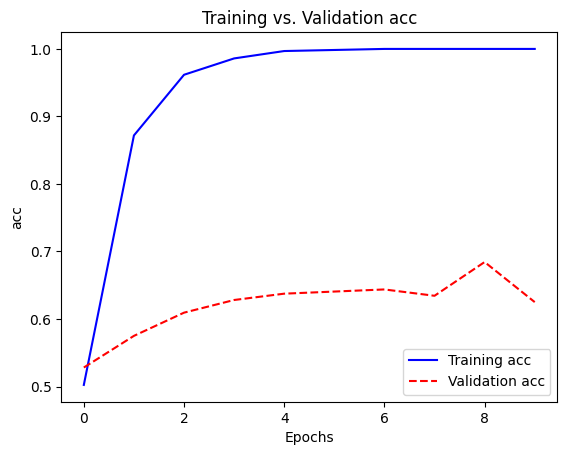

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_results(history, 'acc')

In [17]:
# 테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

13/13 [==============================] - 0s 3ms/step - loss: 0.5766 - acc: 0.6775
#Test accuracy:0.678


### 문서의 순서정보를 활용하는 RNN 기반 문서분류


In [18]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam

'''
model = Sequential([
    Embedding(max_words, 32, input_length=maxlen),
    Flatten(),
    Dense(1, activation='sigmoid')
])
'''

model = Sequential([
    Embedding(max_words, 32),
    SimpleRNN(32), # 펼쳐서 flat하게 만드는 대신 RNN 모형을 사용, maxlen만큼의 시계열 데이터 ### ... 이 부분을 완성하시오
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 323169 (1.23 MB)
Trainable params: 323169 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


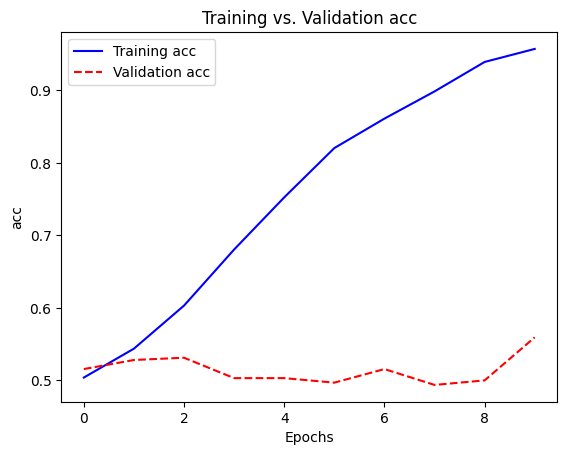

In [19]:
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=0,
                    validation_split=0.2)

plot_results(history, 'acc')

In [20]:
# 테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

13/13 [==============================] - 0s 16ms/step - loss: 0.7399 - acc: 0.5275
#Test accuracy:0.527


---

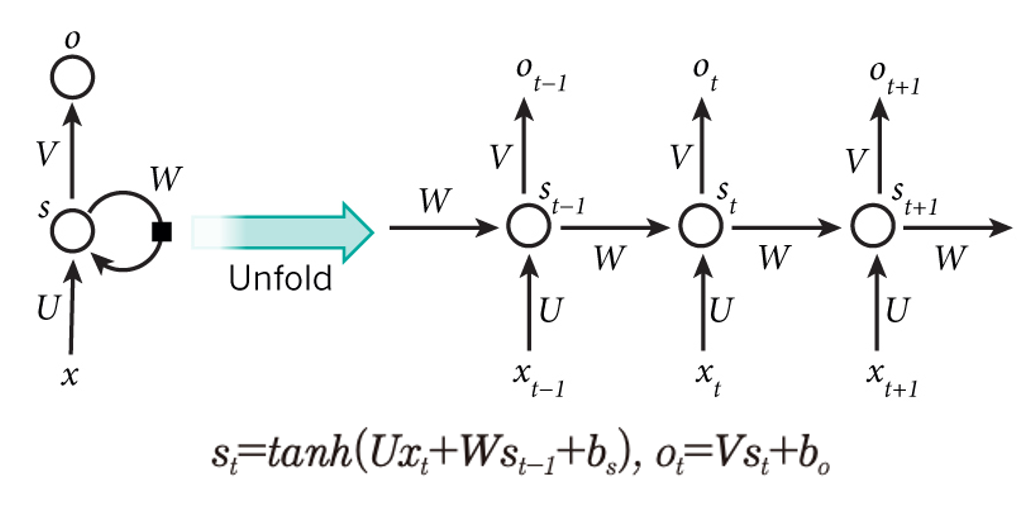

# [[실습 11-2]] RNN을 직접 구현해 본다면?

RNN을 Python을 이용하여 직접 구현해 본다고 하자.
</br>

1. **$s_t$ 값을 구하는 수식 부분을 슈도 코드 형태로 작성해 보시오.**
    * Hint: 수식의 각 부분을 변수명으로 바꾸어 접근해 보기
    
  >input -> X_train 벡터 (단어들의 one-hot 인코딩 결과)</br>
  U -> input값에 곱해지는 가중치</br>
  W -> hidden node에 곱해지는 가중치</br>
  S -> hidden layer의 값(갱신) S(t):t번째 </br>
  output -> 최종 output</br></br>
  for x in X_train</br>
  S(t+1) = tanh(x (multiply) U + W (multiply) S(t) + b)</br>
  
  >t번째 hidden layer의 값은 t번째 x에 가중치를 곱한 결과와 t-1번째 hidden 노드에 가중치 값을 곱한 결과를 더하여 하이퍼볼릭 탄젠트 함수에 대입해 구할 수 있다. 따라서 hidden layer의 값은 input(x)의 길이만큼 갱신되어 입력된다.

2. **어떤 Python 라이브러리/모듈이 필요할 것으로 생각되는가?**
    * import OOO 해야 할 것으로 예상되는 것: numpy, pandas,
    * 그렇게 생각한 이유: 단어의 벡터화와 tanh함수 사용을 위해 두 모듈이 필요할 것이다.

# [파일] -> [다운로드] -> [.ipynb 다운로드]
# 제출 후 **구글 계정 로그아웃** 잘 하시기 바랍니다.